# Lecture 2.3: Tabular Data Pt.2


This lecture, we are going to **explore** the top 50 songs of 2019 spotify [dataset](https://www.kaggle.com/leonardopena/top50spotify2019) with [pandas](https://pandas.pydata.org/).

**Learning goals:**
- Calculate column statistics
- Group and aggregate rows
- Investigate how variables relate
- Calculate a new variable
- Answer questions about the dataset

---

## 1. Summary Statistics

In lecture 2.2, we saw a couple of tricks to get insights into large datasets. The `.head()` method on `DataFrame` could get us an overview of the columns and the type of data that they hold. The selection methods `[]`, `.loc[]`, and `.iloc[]` allowed us to focus on specific parts of the dataset. Finally, we showed that the `df.plot.line()` method could be used to visualise numeric columns. 

However, it still feels like we are mostly blind to what kind of data is actually held in the dataframe. What's the most common `Genre`? The minimum value of `Liveness`? What's the range of `Danceability`?  This might be somewhat obvious for well known variables like `Beats.Per.Minute`, but we'll often come across variables that we have no intuition for. Therefore being able to _summarize_ the main statistical attributes of each column is key to _understand_ the dataset better. This, in turn, will allow us to _use_ it more effectively in downstream tasks.

Once again, let's load and inspect our [top 50 spotify songs of 2019](https://www.kaggle.com/leonardopena/top50spotify2019) dataset:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('top50.csv', encoding = "latin")
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
df.iloc[:,[6,13,7]]

,Danceability,Popularity,Loudness..dB..
0,76,79,-6
1,79,92,-4
2,40,85,-4
3,64,86,-8
4,58,94,-4
5,80,84,-5
6,75,92,-6
7,48,90,-5
8,88,87,-6
9,70,95,-11


One column that is still particularly enigmatic to me is `Danceability`. I can guess that songs with high `Danceability` probably have a fast, regular beat, but I have no idea of what's a "good" or "bad" `Danceability` score. In other words, we'd like to know the min/max _range_ of the `Danceability` column to better understand the values.

You can guess that this is a common scenario during data exploration, and thus pandas makes this very easy:

In [2]:
df['Danceability'].min()

29

In [3]:
df['Danceability'].max()

90

Here, we selected the `Danceability` column using the `[]`, which if you remember from last lecture returns a `Series` object, and we then called the `Series` methods [`.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html) and [`.max()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html).

We also could have got _all_ of the columns' minimum values by calling [`.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) directly on the `DataFrame`:

In [4]:
df.min()

Unnamed: 0                          1
Track.Name          0.958333333333333
Artist.Name                 Ali Gatie
Genre                     atl hip hop
Beats.Per.Minute                   85
Energy                             32
Danceability                       29
Loudness..dB..                    -11
Liveness                            5
Valence.                           10
Length.                           115
Acousticness..                      1
Speechiness.                        3
Popularity                         70
dtype: object

Now that we know that `Danceability` $\in [29, 90]$, we're curious to know what's the most danceable song of 2019! One way to achieve this would be to use the [`.sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) method we've used before, and then pick the first row using `df.iloc[0]`. However, sorting is slow, and we'd be messing with the order of the rows. We could also use a _boolean mask_ checking rows with elements equal to that max value. Whilst that would work, there is an easier way.

To find the _index_ of min or max values, we can use the [`.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmin.html) and [`.idxmax()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html) methods.

In [16]:
df['Danceability'].idxmax()



43

This returns the _label_ of the row where the max value occurs. Therefore, we can easily fetch the most danceable song of 2019 by combining the above with `.loc[]`:

In [22]:
df.loc[df['Danceability'].idxmax()]


Unnamed: 0              44
Track.Name            Talk
Artist.Name         Khalid
Genre                  pop
Beats.Per.Minute       136
Energy                  40
Danceability            90
Loudness..dB..          -9
Liveness                 6
Valence.                35
Length.                198
Acousticness..           5
Speechiness.            13
Popularity              84
Name: 43, dtype: object

Very danceable indeed! 💃

We've now got an idea of what's a good `Danceability` score, and an example of a danceable song. But most songs aren't as groovy as Khalid's tune! How do we know what's a _normal_ amount of `Danceability`? To do this, we can calculate the column _average_. As expected, pandas makes this trivial:

In [8]:
df['Danceability'].mean()

71.38

Wow, it seems popular songs are quite danceable on average! As we know from the minimum value = 29, there must still be some variation. Calculating the _standard deviation_ of the column is useful to gauge this variation:

In [9]:
df['Danceability'].std()

11.929880167727022

Calculating ranges, means, and standard deviations in this exploratory manner are ways of trying to characterise the _distribution_ of the column. A more visual way of doing so, is by directly plotting a histogram. Just like with the line plot, pandas makes this possible in one line:

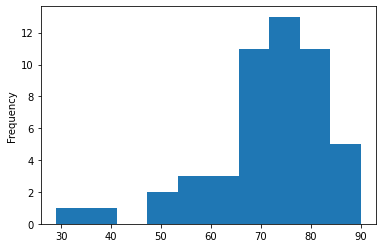

In [10]:
df['Danceability'].plot.hist()

We now have a full statistical description of the `Danceability` column, and "understand" the variable better. We can notice that most popular songs in 2019 were very danceable, with a small group of not so danceable songs. (Can you figure out which ones?)

Now, please don't be mad, but I've been keeping a trick from you this whole time. It's possible to get a statistical summary of every column in a `DataFrame` by using the [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method:

In [11]:
df.describe()
# The percentiles represent the distribution of the data (medians)

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


So now we know how to run `.min()`, `.max()`, `.mean()`, and `.std()` methods on `DataFrame` columns, but we also know that there is no need to do so if we've already inspected the `.describe()` output! This is often the first exploration step for a new dataset.

🧠 Can you explain what the $25\%$, $50\%$, and $75\%$ rows represent in the statistical summary?

Despite having this great statistical summary, one aspect of the dataset remains unclear. You might have noticed that columns with non-numerical `dtypes` were not included in the `.describe()` summary (e.g `Track.Name`). 

We can include them by using this argument:

In [12]:
df.describe(include='all')

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50,50,50,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,NaN,50,38,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,7 rings,Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25.50000,NaN,NaN,NaN,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,NaN,NaN,NaN,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,NaN,NaN,NaN,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,NaN,NaN,NaN,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,NaN,NaN,NaN,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,NaN,NaN,NaN,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000


This is slightly messier, since we can't calculate the mean of `string`s or the frequency of `float`s. We can now see information about the string columns however. Dance pop is sooooo 2019... 💁‍♂️

Not all the summary statistics you might want are in the `.describe()` table. For example, the `top` value for the `Track.Name` column is fairly useless... Its `freq` is 1 meaning that they are all unique track names. That makes sense, it would be quite a coincidence if two tracks in the top 50 songs of 2019 shared a name! Nevertheless, this means that we still don't have many insights into the "typical" track name in 2019. 

Even if it's slightly more complex, we can find the 10 most common words used in the track titles:

In [73]:
pd.Series(''.join(df['Track.Name']).lower().split()).value_counts()[:10]

#value_counts() returns frequency of unique objects in the given index

In [147]:
pd.Series(''.join(df['Artist.Name']).split()).value_counts()[:5]

TypeError: 'list' object is not callable

String Join() and String Splirt () :

The join() method takes all items in an iterable and joins them into one string.

A string must be specified as the separator.


The split() method splits a string into a list.

You can specify the separator, default separator is any whitespace.

Note: When maxsplit is specified, the list will contain the specified number of elements plus one.



The lower() method returns a string where all characters are lower case.

 Symbols and Numbers are ignored.

Looks like a lot of songs were featuring Justin Bieber! 🙉

🧠🧠 Can you tell what's happening here? Take the time to go through each step. If you haven't seen them before, read about the [`.join()`](https://www.w3schools.com/python/ref_string_join.asp) and [`.split()`](https://www.w3schools.com/python/ref_string_split.asp) string methods.

You might have noticed that `.describe()` returns a `DataFrame`... which means that we can manipulate and analyse it like any other pandas object!

💪 Can you figure out which column has the highest mean? You can of course manually inspect the `.describe()` table, but you should write a function called `.highest_mean()` which takes the `describe_df`, and returns the _column name_ of the column with the highest mean value. You should be able to fit your code in one line!

In [41]:
def highest_mean(describe_df):
    # INSERT YOUR CODE HERE
    
    hm = df.describe().loc['mean'].idxmax()
    
    
    return hm
    
def test_highest_mean():
    assert highest_mean(df.describe()) == 'Length.'
    print('Success! 🎉')

test_highest_mean()

Success! 🎉


In [52]:
#Lambda Functions :

#The power of lambda is better shown when you use them as an anonymous function inside another function.

def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)

print(mydoubler(11))

#Use lambda functions when an anonymous function is required for a short period of time.

22


The assert keyword is used when debugging code.

The assert keyword lets you test if a condition in your code returns True, if not, the program will raise an AssertionError.

In [60]:
x = "goodbye"

#if condition returns False, AssertionError is raised:
assert x == "hello" , "The input must be goodbye"

AssertionError: The input must be goodbye

## 2. Group-By

Calculating summary statistics for our dataset has given us a better understanding of the variables. However in data science, we often look to answer specific questions that provide _business value_. These questions are rarely as simple as "what's the average bpm of the most popular songs of 2019?". They often involve _combining_ statistics and aggregate measures of _several_ columns. For example, "what's the most danceable genre?". This kind of questions can bring real actionable insights to businesses, therefore knowing how to answer them is important!

To calculate statistics over several columns, we need to understand the concept of _group-by_. According to the excellent pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), a group-by operation has three steps:
> - Splitting the data into groups based on some criteria.  
> - Applying a function to each group independently.  
> - Combining the results into a data structure.

So for the example of "the most danceable genre", we need to:
- split the dataset by `Genre`
- average the `Danceability` values to each `Genre` independently
- concatenate those averages into a new dataframe with a `Genre` labeled index

This only describes the group-by operation of course, and we'll still have to find the max `Danceability` row.

Dancing put aside, the second group-by step ("applying a function") can take different forms. During this lecture we'll focus on _aggregation_ and _filtering_ functions.

### 2.1 Aggregation

According to the documentation:

> Aggregation functions compute a summary statistic (or statistics) for each group

In other words, they are "reduce" type functions. Their input is a collection and they return a single value. Common examples of aggregation functions are the summary statistics we saw in section 1, i.e `.mean()`, `.std()`, `.max()`, ... Let's find out the most danceable genres by using an aggregation group-by on our dataset. 

In pandas, group-by starts with the [`.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method:

In [28]:
df.groupby('Genre')

It returns a `DataFrameGroupBy` object that has no readable output. One way of looking into this object is using known group _values_:

In [29]:
df.groupby('Genre').get_group('edm')

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
30,31,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
40,41,Higher Love,Kygo,edm,104,68,69,-7,10,40,228,2,3,88
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88


Here, we've accessed the `edm` group of the `GroupBy` object, which is equivalent to all the dataset rows with `Genre` == `edm`. This means that so far, we've only achieved the same a boolean mask selection. 

To truly leverage the hidden power of `.groupby()`, we have to "apply functions to the groups independently". This is done through methods on the `GroupBy` object. ([Here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)'s the complete list).

Some of these methods are aggregation methods, such as `.mean()`. It will return the mean value of every column of the original `DataFrame` _per group_:

In [109]:
df.groupby('Genre').mean().head()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Genre,,,,,,,,,,,
atl hip hop,34.0,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,89.0
australian pop,27.0,98.0,59.0,82.0,-6.0,18.0,54.0,210.0,69.0,10.0,83.0
big room,36.0,114.0,72.0,66.0,-7.0,14.0,32.0,164.0,18.0,6.0,89.0
boy band,39.0,138.0,73.0,84.0,-5.0,11.0,95.0,181.0,4.0,6.0,80.0
brostep,47.0,94.0,70.5,67.5,-2.5,37.5,55.5,198.0,13.0,5.0,88.0


Notice how the `Genre` is now the index of the returned `DataFrame`. We can already use this to mine for patterns and trends. For instance, you might observe that `edm` is less danceable than `country rap`... 🤠

Let's build a ranking of the 5 most danceable genres. Since the object returned by the `.mean()` method on the `GroupBy` is a `DataFrame`, we can use our trusted selection and sorting methods:

In [110]:
df_by_genre = df.groupby(by='Genre').mean()
df_by_genre['Danceability'].sort_values(ascending=False)[:5]

Genre
r&b en espanol    88.0
boy band          84.0
australian pop    82.0
atl hip hop       80.0
reggaeton flow    80.0
Name: Danceability, dtype: float64

Congratulations to Spanish R&B for lighting up the clubs in 2019! 🔥

### 2.2 Filtration

Sad songs are canceled 🙅‍♀️! 2020 has been too much already, and in an effort to lift our spirits, we decide to ban all music genres that create negative music. This means that the summary table we obtained with `.describe()` isn't valid anymore... those negative genres shouldn't be counted in the statistics! 

Luckily our dataset has a `Valence` column, which according to its [online description](https://www.kaggle.com/leonardopena/top50spotify2019):

> The higher the value, the more positive mood for the song.

Perfect! We know from our summary statistics that the 25% percentile for this variable is at 38.25. Let's filter out genres where the mean `Valence` < 40, and that should leave us with positive mindsets only 🙃.

This is an example of a _filtration_ function in a group-py operation. Its input is a collection of values and it returns a boolean value, depending on if the _group_ should be filtered or not.

Group-by filtration in pandas uses the [`.filter()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#filtration) method. It takes a [`lambda function`](https://stackoverflow.com/questions/16501/what-is-a-lambda-function) as input, and returns the filtered and concatenated dataframe. The lambda will operate on each group independently. In our case, we wish our lambda to do two things:
- calculate the mean of the `Valence`
- return False if the mean < 40

We can write it all in one line as such:

In [42]:
happy_df = df.groupby('Genre').filter(lambda df: df['Valence.'].mean() > 40.)
happy_df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


This looks similar to before, but if we take a closer look at the shape of the new `DataFrame`, we can notice that some rows were removed:

In [43]:
happy_df.shape

(44, 14)

In [50]:
df_sad = df.groupby('Genre').filter(lambda df: df['Valence.'].mean()<40.)
df_sad.head()
df_sad.shape

(6, 14)

In [131]:
#Finding the difference between two data frames using concat and drop_duplicates()
Difference_df = pd.concat([df,happy_df]).drop_duplicates(keep = False)

sad_gr = Difference_df['Genre']

sad_gr



6           trap music
14    canadian hip hop
18    canadian hip hop
27    canadian hip hop
33         atl hip hop
35            big room
Name: Genre, dtype: object

We did it! No more sad genres to poison our souls, only shiny happy people holding hands 🙆‍♂️

💪 Can you figure out which genres we have banned? You could try to find the differences between `df` and `happy_df`, or use group-by with aggregation function `.mean()` to find the genres with `Valence.` < 40.

💪💪 A radio station is updating their strategy, and need to know the total airtime of each genre. Let's assume that our dataset is the complete list of songs they have played recently. In the cell below, write a function that takes our dataset, and returns a `Series` with `Genre` as index, and the summed `Length.` of each genre's songs as data.

In [20]:
def analyse_airtime(df):
    # INSERT CODE HERE
    df_by_genre = df.groupby(by='Genre')
    length_df = df_by_genre['Length.'].sum()
       
   
    return pd.Series(length_df)

def test_analyse_airtime():
    airtime_df = analyse_airtime(df)
    assert airtime_df.loc['edm'] == 656
    print('Success! 🎉')
    print('The top 5 genres with the most airtime are:\n')
    print(airtime_df.sort_values(ascending=False)[:5])

test_analyse_airtime()

Success! 🎉
The top 5 genres with the most airtime are:

Genre
dance pop         1621
pop               1368
latin             1126
edm                656
reggaeton flow     611
Name: Length., dtype: int64


## 3. Correlation

A common question asked about data is how some columns relate to others. Correlation is a statistical measure of how changes in one variable coincide with changes in another. This can be useful for prediction, modeling, inference, or just understanding more about the processes described by the data. Realpython has a great in-depth tutorial [here](https://realpython.com/numpy-scipy-pandas-correlation-python/) which explains correlation and how to measure it in python.

Let's imagine we are trying to understand more about music through our dataset. We are trying to get a "feel" of the mechanisms behind our variables. We hypothesize that the biggest factor affecting danceability is a steady, snappy, fast beat. 🥁 We also believe that fast beats are a good indicator of a song with high energy. Therefore, we guess that `Energy` is _positively correlated_ with `Danceability`. But these are all suppositions. We'd like a quick sanity check on our "theory of music" by exploring the data.

One way of assessing correlation is to plot the variables in question:



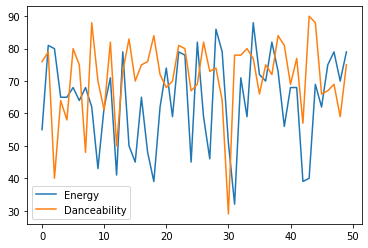

In [21]:
df[['Energy', 'Danceability']].plot.line()

Highly positively correlated lines are expected to vary in the same direction at the same time. It is not so clear here, so we can view a scatter plot instead:

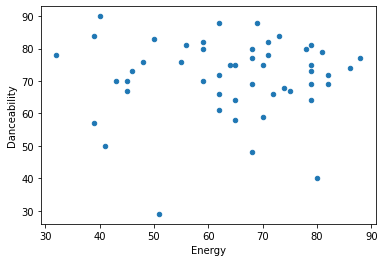

In [22]:
df.plot.scatter(x='Energy', y='Danceability')

By plotting the `Danceability` vs the `Energy`, we can see that there is no apparent correlation between the variables. 

This leads us to rethink our theory of `Energy`. Perhaps high energy is less about the rhythmic section, and more about the tonality and the harmonics of the song. In this case, we expect `Energy` to be positively correlated with `Valence.` which describes the "positivity" of the tune.

Let's take a look at the scatter plot:

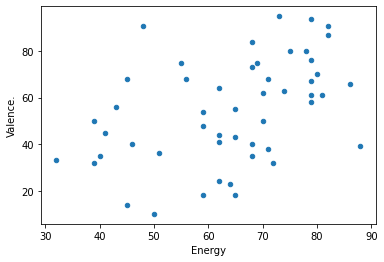

In [23]:
df.plot.scatter(x='Energy', y='Valence.')

The correlation is not strong, but we can notice a general trend: when `Energy` is high, `Valence.` is more likely to be high too. pandas also offers methods to directly measure the correlation between variables:

In [24]:
df['Energy'].corr(df['Valence.'])

0.43881958610521754

In [26]:
df['Energy'].corr(df['Danceability'])

0.01825357584565256

Here, we measured the pearson r between `Energy` and `Valence.`, showing indeed that the two are positively correlated. 

⚠️ Analysing correlations of variable is an entire field of statistics requiring formal tests and techniques. This was a simple example of how pandas makes it easy to explore various aspects of a dataset, including relationships between variables, and is in no way a replacement for sound statistical analysis.

## 4. Calculating New Variables

We've covered several ways of getting insights from the dataset. But wouldn't it be cool if we could _add_ insights to the dataset? 😎

We'll often need to save new variables. This could be because we're adding useful statistics, or calculating new values entirely. 

### 4.1 Normalisation

Normalisation is common in machine learning because of a process called [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling). In short, some models train better if variables have means ~ 0 and standard deviations ~ 1. Let's normalise our `Energy` column!

First we need to define a normalisation function. In this case, we'll use [z-score normalisation](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)).

In [27]:
def normalise(x, mean, std):
    return (x - mean) / std

To apply this function on our `Energy`, we need to know the mean and the standard deviation of the column.

In [28]:
mean = df['Energy'].mean()
std = df['Energy'].std()

Now, we can wrap our function, `mean` value, and `std` value in a `lambda`. Then we can use this `lambda` in the `.apply()` method, which will calculate the normalised `Energy` values for each row. Finally, we can assign the returned `Series` to a new column name:

In [29]:
df['Energy.Norm'] = df['Energy'].apply(lambda x: normalise(x, mean, std))
df['Energy.Norm'].head()

0   -0.636597
1    1.190283
2    1.120018
3    0.066049
4    0.066049
Name: Energy.Norm, dtype: float64

Let's check that the new column is indeed normalised:

In [30]:
print('This is the normalised mean:')
print(df['Energy.Norm'].mean())
print('This is the normalised standard deviation:')
print(df['Energy.Norm'].std())

This is the normalised mean:
-1.6431300764452317e-16
This is the normalised standard deviation:
0.9999999999999999


If we ignore the floating precision, those values look good! 🎊 We can also directly check the effect of normalisation on the distribution of the variable:

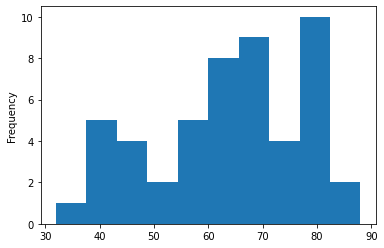

In [31]:
df['Energy'].plot.hist()

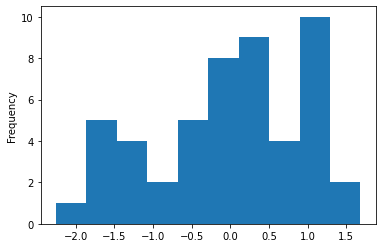

In [32]:
df['Energy.Norm'].plot.hist()

As expected, the distribution _shape_ remains unchanged, but its x-axis range is shifted to be centered around 0 and standard deviation = 1. And that should make our ML models happy 😃

### 4.2 Calculating a New Variable

📢 The data scientists at spotify have made a new discovery!  
How lit 🔥 a song is can be calculated using the following equation:

$$
🔥 = 0.1337 \times \frac{(danceability + popularity)}{(- loudness)}
$$

We would like to add this to our dataset so that we can display the "litness" of a song to users.

💪💪 Create a new column called `Litness` in the dataset. To achieve this, complete the `.litness()` function below. Then use `.apply()` to apply the function to our dataset. Pro-tip: Think about the input to your `lambda` function. Extra-tip: Since `litness` is a function that requires data from several columns, we want to apply it per row. i.e You'll need to use `axis=1` here... 

💪 What's the most lit song of 2019?

In [18]:
import math

def litness(danceability, popularity,loudness):
    # INSERT YOUR CODE HERE
    return 0.1337*((danceability + popularity)/(-loudness))

def add_litness(df):
    # INSERT YOUR CODE HERE
                      
    df['Litness']= df.apply(lambda row: litness(row['Danceability'],row['Popularity'],row['Loudness..dB..']),axis = 1)
    
    return df

def test_litness():
    lit_df = add_litness(df)
    assert lit_df['Litness'].idxmax() == 13
    assert math.isclose(lit_df.loc[13, 'Litness'], 10.696)
    print('Success! 🎉')
    print('\nThe most lit song of 2019 is:')
    print(lit_df.loc[13])

test_litness()

Success! 🎉

The most lit song of 2019 is:
Unnamed: 0                          14
Track.Name          Otro Trago - Remix
Artist.Name                       Sech
Genre                   panamanian pop
Beats.Per.Minute                   176
Energy                              79
Danceability                        73
Loudness..dB..                      -2
Liveness                             6
Valence.                            76
Length.                            288
Acousticness..                       7
Speechiness.                        20
Popularity                          87
Litness                         10.696
Name: 13, dtype: object


## 5. Summary

Today, we carried out a comprehensive data exploration of **tabular data**. First, we calculated **summary statistics** to get an overview of the values in our pandas `DataFrame`. We also learned the **group-by** process, and used it to **answer questions** about the dataset. Then, we probed how several variables **correlated** to one another. Finally, we **normalised** a column, and **calculated a new variable** using a mathematical model. Overall, we got a pretty good idea of what music was popular in 2019. 🔥

This concludes the data exploration section about tabular data. You should have all the tools necessary to manipulate tables in python using pandas. Next, we will focus on other data types, such as time series, text, images, and geospatial data.


# Resources

## Core Resources
- [Exploratory data analysis notebook](https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)  
A great example of data exploration carried out using pandas
- [Python data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)  
The python data science handbook introduction to pandas.

## Additional Resources

- [auqntecon pandas course](https://python-programming.quantecon.org/pandas.html)
Jupyter notebook with basic financial analysis using pandas
- [Pandas tutorial](https://bitbucket.org/hrojas/learn-pandas/src/master/)
- [Exploratory data analysis with pandas](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)  
In-depth Kaggle kernel of example data exploration with pandas
